In [2]:
import keras
keras.__version__

'2.12.0'

In [3]:
from keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_labels.shape

(60000,)

In [6]:
# 데이터의 확인 
import matplotlib.pyplot as plt

digit = train_images[4]
print(digit)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113
   87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 18

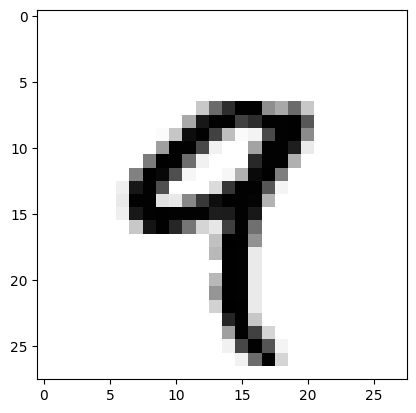

In [7]:
# 데이터의 확인 
import matplotlib.pyplot as plt

digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)

In [8]:
# 신경망을 만드는 부분
from keras import models
from keras import layers

network=models.Sequential()
network.add(layers.Dense(512,activation='relu',input_shape=(28*28,))) # input_shape : 입력되는 것의 모양을 정해라
network.add(layers.Dense(10,activation='softmax'))  #0~9 까지
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy', #여러 개 중 하나로 분류하는 것
                metrics=['accuracy'])

In [9]:
# 데이터를 준비하는 부분
train_images=train_images.reshape((60000,28*28))
train_images=train_images.astype('float32')/255

test_images=test_images.reshape((10000,28*28))
test_images=test_images.astype('float32')/255

In [10]:
# 라벨 데이터를 카테고리 데이터로 변환
from tensorflow.keras.utils import to_categorical

train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

In [11]:
# 신경망의 학습
network.fit(train_images,train_labels,batch_size=128,epochs=5) 

Epoch 1/5
469/469 [==============================] - 14s 27ms/step - loss: 0.2619 - accuracy: 0.9246
Epoch 2/5
469/469 [==============================] - 6s 13ms/step - loss: 0.1069 - accuracy: 0.9691
Epoch 3/5
469/469 [==============================] - 7s 15ms/step - loss: 0.0704 - accuracy: 0.9794
Epoch 4/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0513 - accuracy: 0.9846
Epoch 5/5
469/469 [==============================] - 7s 15ms/step - loss: 0.0380 - accuracy: 0.9890


In [12]:
test_loss, test_acc= network.evaluate(test_images,test_labels)
print('test acc: ',test_acc,'\n test loss: ',test_loss)

313/313 [==============================] - 2s 4ms/step - loss: 0.0652 - accuracy: 0.9795
test acc:  0.9794999957084656 
 test loss:  0.06521658599376678


In [13]:
# IMDB

from keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000) # num_words : 빈도가 높은 순으로 10000가지 단어 가져오기

17464789/17464789 [==============================] - 0s 0us/step


In [14]:
train_data.shape

(25000,)

In [15]:
train_labels[0:5]

array([1, 0, 0, 1, 0])

In [16]:
max([max(sequence) for sequence in train_data])

9999

In [17]:
# 데이터를 준비
import numpy as np

# 적당한 크기의 배열
def vectorize_sequences(sequences,dimension=10000):
  result=np.zeros((len(sequences),dimension)) #전체 데이터가 들어갈 배열을 0으로 채워넣음

  print(result.shape)

  for i, sequence in enumerate(sequences):
    result[i,sequence]=1 #해당 되는 단어의 위치에 1로 채워넣음
  return result

In [18]:
a=[1,2,3,4]
for i,item in enumerate(a):
  print(i,item)

0 1
1 2
2 3
3 4


In [19]:
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

(25000, 10000)
(25000, 10000)


In [20]:
x_train[0] # float type으로 바꿔야함 why?

array([0., 1., 1., ..., 0., 0., 0.])

In [21]:
 # label data도 실수형으로
 y_train=np.asarray(train_labels).astype('float32')
 y_test=np.asarray(test_labels).astype('float32')

In [22]:
y_train[0]

1.0

In [30]:
# 신경망 제작
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,))) # input layer
model.add(layers.Dense(16,activation='relu')) # hidden layer
model.add(layers.Dense(1,activation='sigmoid')) # output layer
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [32]:
history= model.fit(partial_x_train,
                    partial_y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/4
30/30 [==============================] - 4s 107ms/step - loss: 0.5425 - accuracy: 0.7583 - val_loss: 0.4047 - val_accuracy: 0.8697
Epoch 2/4
30/30 [==============================] - 2s 55ms/step - loss: 0.3306 - accuracy: 0.8945 - val_loss: 0.3325 - val_accuracy: 0.8704
Epoch 3/4
30/30 [==============================] - 1s 44ms/step - loss: 0.2463 - accuracy: 0.9187 - val_loss: 0.3028 - val_accuracy: 0.8780
Epoch 4/4
30/30 [==============================] - 1s 42ms/step - loss: 0.1950 - accuracy: 0.9356 - val_loss: 0.2769 - val_accuracy: 0.8906


In [26]:
history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

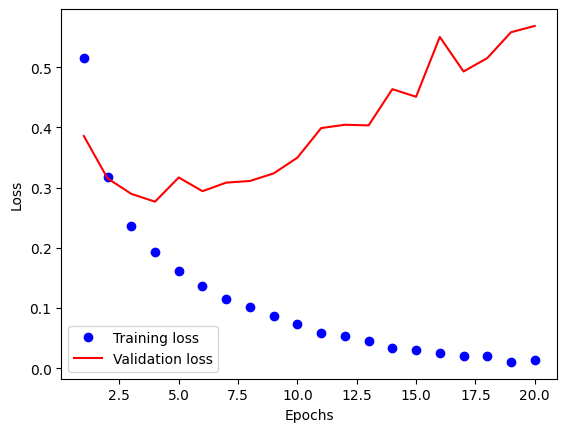

In [27]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']


epochs = range(1,len(acc)+1)

plt.plot(epochs, loss, 'bo',label='Training loss')
plt.plot(epochs, val_loss, 'r',label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

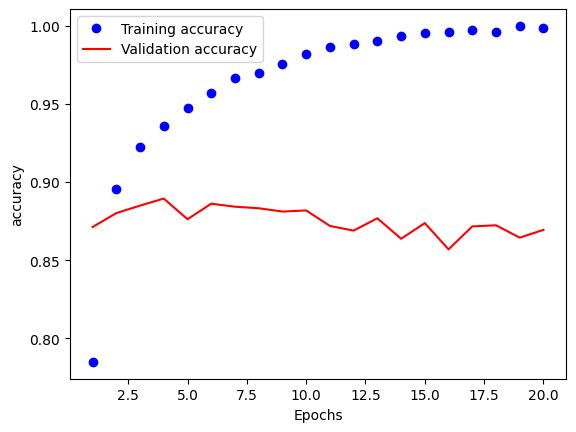

In [28]:
plt.plot(epochs, acc, 'bo',label='Training accuracy')
plt.plot(epochs, val_acc, 'r',label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

In [33]:
model.predict(x_test)

782/782 [==============================] - 3s 4ms/step


array([[0.29308954],
       [0.99837047],
       [0.9187115 ],
       ...,
       [0.10183883],
       [0.16709585],
       [0.7051858 ]], dtype=float32)

In [34]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('loss={0}, accuracy={1}'.format(test_loss, test_acc))

782/782 [==============================] - 3s 4ms/step - loss: 0.2888 - accuracy: 0.8837
loss=0.2887662649154663, accuracy=0.883679986000061
